In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df_car_details = pd.read_csv('/content/drive/MyDrive/car details v4.csv')

# Remove rows with missing values
df_car_details.dropna(inplace=True)




In [3]:
# Preview the dataset
print(df_car_details.head())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

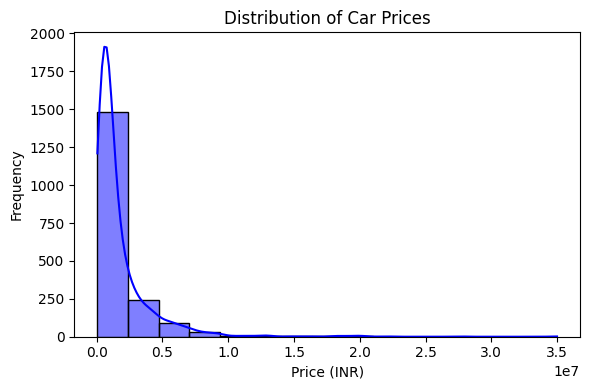

In [6]:
# Histogram of Price
plt.figure(figsize=(6, 4))
sns.histplot(df_car_details['Price'], bins=15, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("car_price_distribution.jpg")
plt.show()

In [7]:
# Scaling the 'Price' for clustering
scaler = StandardScaler()
df_car_details['Price_Scaled'] = scaler.fit_transform(df_car_details[['Price']])

In [8]:
# Perform KMeans clustering based on the scaled price
kmeans = KMeans(n_clusters=3, random_state=42)
df_car_details['Cluster'] = kmeans.fit_predict(df_car_details[['Price_Scaled']])

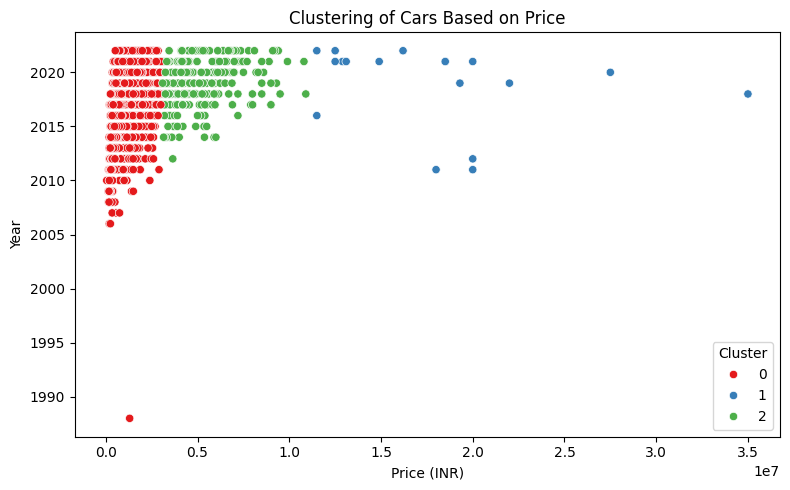

In [11]:
# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Year', hue='Cluster', data=df_car_details, palette='Set1')
plt.title('Clustering of Cars Based on Price')
plt.xlabel('Price (INR)')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig("car_clusters.jpg")
plt.show()

In [12]:
# Summarize each cluster's average price
cluster_summary = df_car_details.groupby('Cluster')['Price'].mean()
print("Average Price for each Cluster:\n", cluster_summary)

Average Price for each Cluster:
 Cluster
0    9.570503e+05
1    1.773158e+07
2    5.121812e+06
Name: Price, dtype: float64


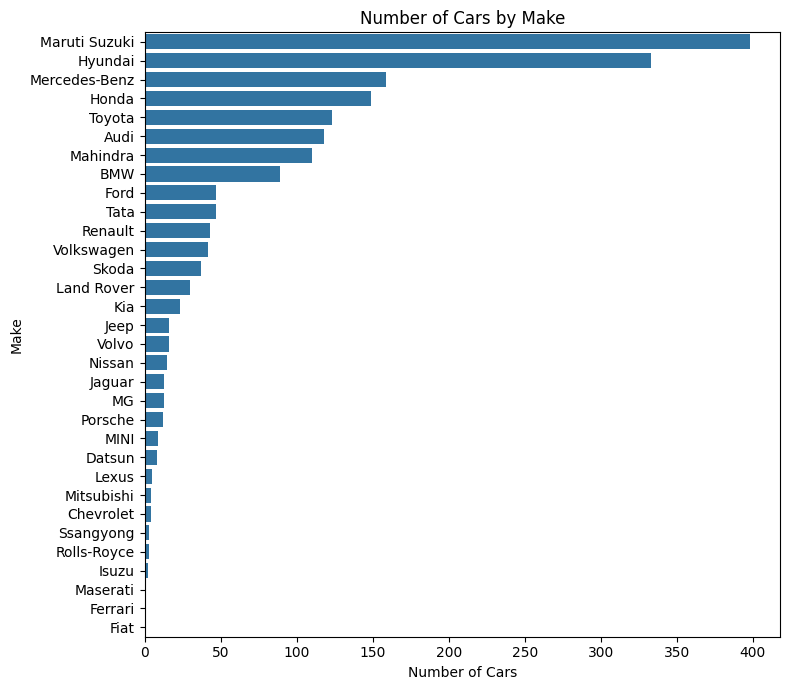

In [14]:
# Bar plot of Car Count by Make
plt.figure(figsize=(8, 7))
df_car_make_counts = df_car_details['Make'].value_counts()
sns.barplot(x=df_car_make_counts.values, y=df_car_make_counts.index)
plt.title('Number of Cars by Make')
plt.xlabel('Number of Cars')
plt.ylabel('Make')
plt.tight_layout()
plt.savefig("car_make_distribution.jpg")
plt.show()

In [15]:
# Add Car Price Density
df_car_details['Price_Density'] = df_car_details['Price'] / df_car_details['Price'].sum()


In [16]:
# Sort by density for better visualization
df_sorted_density = df_car_details.sort_values(by='Price_Density', ascending=False)

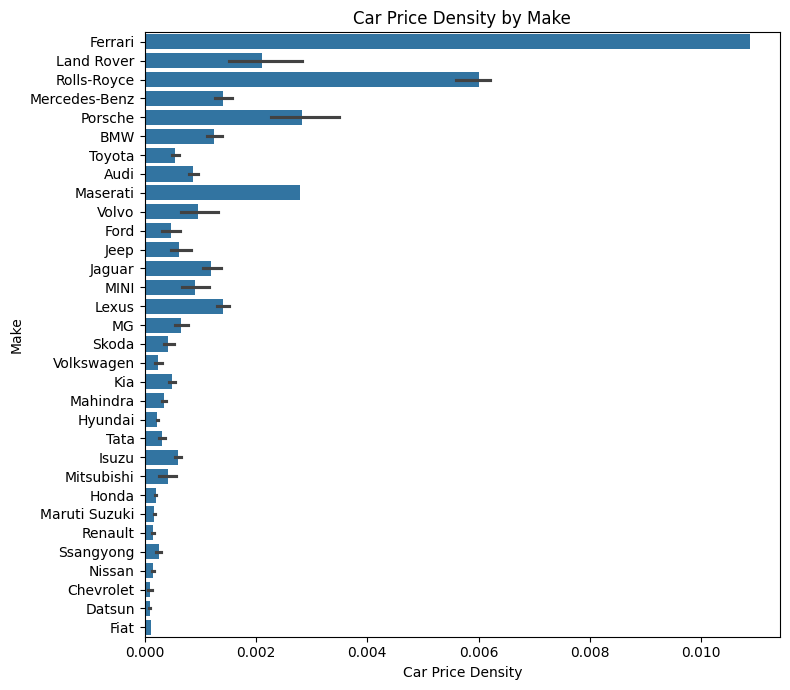

In [18]:
# Plotting the Car Price Density by Make
plt.figure(figsize=(8, 7))
sns.barplot(x='Price_Density', y='Make', data=df_sorted_density)
plt.title('Car Price Density by Make')
plt.xlabel('Car Price Density')
plt.ylabel('Make')
plt.tight_layout()
plt.savefig("car_density_by_make.jpg")
plt.show()

In [19]:
# Segmenting cars into categories based on Price
conditions = [
    (df_car_details['Price'] > 1500000),
    (df_car_details['Price'] > 500000) & (df_car_details['Price'] <= 1500000),
    (df_car_details['Price'] <= 500000)
]
choices = ['High Price', 'Moderate Price', 'Low Price']
df_car_details['Price Segment'] = np.select(conditions, choices, default='Unknown')

In [20]:
# Display the categorized cars
print(df_car_details[['Make', 'Price', 'Price Segment']])

               Make    Price   Price Segment
0             Honda   505000  Moderate Price
1     Maruti Suzuki   450000       Low Price
2           Hyundai   220000       Low Price
3            Toyota   799000  Moderate Price
4            Toyota  1950000      High Price
...             ...      ...             ...
2053  Maruti Suzuki   245000       Low Price
2054       Mahindra   850000  Moderate Price
2055        Hyundai   275000       Low Price
2056           Ford   240000       Low Price
2057            BMW  4290000      High Price

[1874 rows x 3 columns]


In [21]:
# Group by cluster and summarize
cluster_profile = df_car_details.groupby('Cluster')['Price'].describe()
print("Cluster Profiling Summary:\n", cluster_profile)

Cluster Profiling Summary:
           count          mean           std         min         25%  \
Cluster                                                               
0        1589.0  9.570503e+05  6.786440e+05     49000.0    459999.0   
1          19.0  1.773158e+07  5.967230e+06  11500000.0  12950000.0   
2         266.0  5.121812e+06  1.713202e+06   3050000.0   3788750.0   

                50%         75%         max  
Cluster                                      
0          700000.0   1290000.0   3025000.0  
1        18000000.0  20000000.0  35000000.0  
2         4550000.0   6075000.0  10900000.0  


In [22]:
# Adding custom profiling logic
for i in range(3):
    cluster = df_car_details[df_car_details['Cluster'] == i]
    print(f"\nCluster {i} includes cars with the following price range:")
    print(cluster[['Make', 'Price']].values)


Cluster 0 includes cars with the following price range:
[['Honda' 505000]
 ['Maruti Suzuki' 450000]
 ['Hyundai' 220000]
 ...
 ['Mahindra' 850000]
 ['Hyundai' 275000]
 ['Ford' 240000]]

Cluster 1 includes cars with the following price range:
[['Porsche' 16200000]
 ['Mercedes-Benz' 11500000]
 ['Land Rover' 12500000]
 ['Mercedes-Benz' 18500000]
 ['Ferrari' 35000000]
 ['Mercedes-Benz' 13000000]
 ['Land Rover' 22000000]
 ['Rolls-Royce' 18000000]
 ['Toyota' 11500000]
 ['Rolls-Royce' 20000000]
 ['Land Rover' 27500000]
 ['Land Rover' 19300000]
 ['Rolls-Royce' 20000000]
 ['Mercedes-Benz' 12900000]
 ['Mercedes-Benz' 13100000]
 ['BMW' 12500000]
 ['Porsche' 14900000]
 ['Mercedes-Benz' 20000000]
 ['Mercedes-Benz' 18500000]]

Cluster 2 includes cars with the following price range:
[['Mercedes-Benz' 3850000]
 ['BMW' 3800000]
 ['Toyota' 3499000]
 ['Mercedes-Benz' 5100000]
 ['BMW' 3900000]
 ['Audi' 3050000]
 ['Audi' 4900000]
 ['Toyota' 3350000]
 ['Audi' 5651000]
 ['Audi' 3900000]
 ['Mercedes-Benz' 450

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Load the dataset
df_car_details = pd.read_csv('/content/drive/MyDrive/car details v4.csv')

# Remove rows with missing values
df_car_details.dropna(inplace=True)

# Encode categorical features: Transmission and Fuel Type
label_encoder_transmission = LabelEncoder()
label_encoder_fuel = LabelEncoder()

df_car_details['Transmission_Encoded'] = label_encoder_transmission.fit_transform(df_car_details['Transmission'])
df_car_details['Fuel_Type_Encoded'] = label_encoder_fuel.fit_transform(df_car_details['Fuel Type'])




In [25]:
# Perform KMeans clustering based on the scaled features
kmeans = KMeans(n_clusters=3, random_state=42)
df_car_details['Cluster'] = kmeans.fit_predict(df_cluster_data)

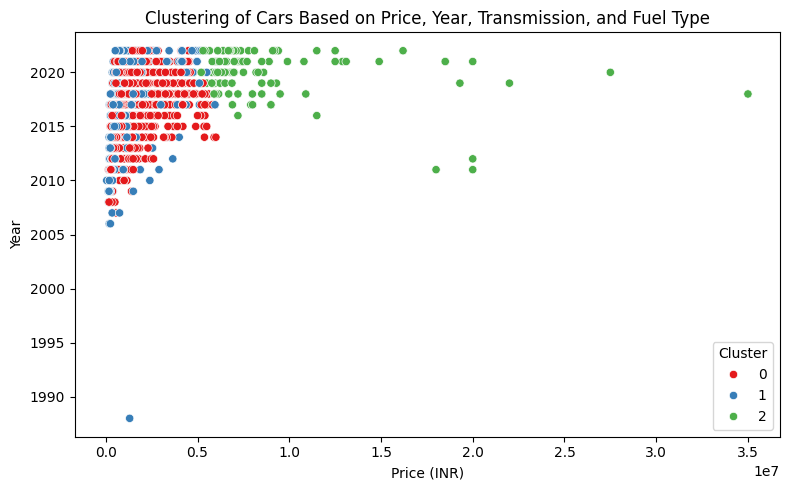

In [27]:
# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Year', hue='Cluster', data=df_car_details, palette='Set1')
plt.title('Clustering of Cars Based on Price, Year, Transmission, and Fuel Type')
plt.xlabel('Price (INR)')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig("car_clusters_with_additional_features.jpg")
plt.show()

In [28]:
# Summarize each cluster's average price and year
cluster_summary = df_car_details.groupby('Cluster')[['Price', 'Year']].mean()
print("Average Price and Year for each Cluster:\n", cluster_summary)

Average Price and Year for each Cluster:
                 Price         Year
Cluster                           
0        1.621124e+06  2016.442184
1        8.911992e+05  2016.608643
2        9.005196e+06  2019.897196


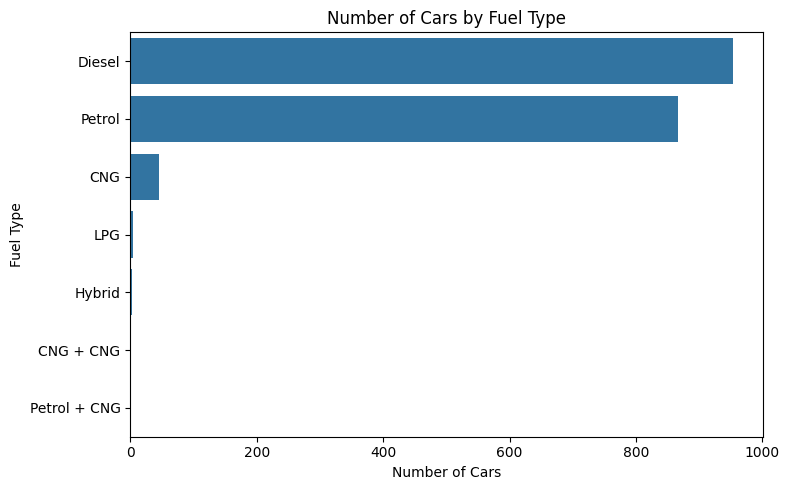

In [30]:
# Bar plot of Car Count by Fuel Type
plt.figure(figsize=(8, 5))
df_fuel_type_counts = df_car_details['Fuel Type'].value_counts()
sns.barplot(x=df_fuel_type_counts.values, y=df_fuel_type_counts.index)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Number of Cars')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.savefig("car_fuel_type_distribution.jpg")
plt.show()

In [31]:
# Add Price Density based on Price
df_car_details['Price_Density'] = df_car_details['Price'] / df_car_details['Price'].sum()

# Sort by density for better visualization
df_sorted_density = df_car_details.sort_values(by='Price_Density', ascending=False)

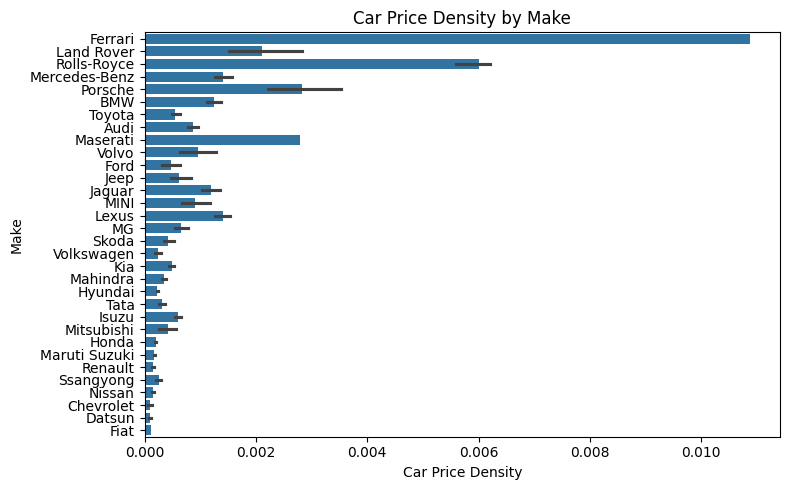

In [33]:
# Plotting the Car Price Density by Make
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Density', y='Make', data=df_sorted_density)
plt.title('Car Price Density by Make')
plt.xlabel('Car Price Density')
plt.ylabel('Make')
plt.tight_layout()
plt.savefig("car_density_by_make_with_transmission_fuel_year.jpg")
plt.show()

In [34]:
# Segmenting cars into categories based on Price
conditions = [
    (df_car_details['Price'] > 1500000),
    (df_car_details['Price'] > 500000) & (df_car_details['Price'] <= 1500000),
    (df_car_details['Price'] <= 500000)
]
choices = ['High Price', 'Moderate Price', 'Low Price']
df_car_details['Price Segment'] = np.select(conditions, choices, default='Unknown')

In [35]:

# Display the categorized cars
print(df_car_details[['Make', 'Price', 'Price Segment', 'Transmission', 'Fuel Type', 'Year']])

# Group by cluster and summarize
cluster_profile = df_car_details.groupby('Cluster')[['Price', 'Year']].describe()
print("Cluster Profiling Summary:\n", cluster_profile)

               Make    Price   Price Segment Transmission Fuel Type  Year
0             Honda   505000  Moderate Price       Manual    Petrol  2017
1     Maruti Suzuki   450000       Low Price       Manual    Diesel  2014
2           Hyundai   220000       Low Price       Manual    Petrol  2011
3            Toyota   799000  Moderate Price       Manual    Petrol  2019
4            Toyota  1950000      High Price       Manual    Diesel  2018
...             ...      ...             ...          ...       ...   ...
2053  Maruti Suzuki   245000       Low Price       Manual    Petrol  2014
2054       Mahindra   850000  Moderate Price       Manual    Diesel  2016
2055        Hyundai   275000       Low Price       Manual    Petrol  2014
2056           Ford   240000       Low Price       Manual    Petrol  2013
2057            BMW  4290000      High Price    Automatic    Diesel  2018

[1874 rows x 6 columns]
Cluster Profiling Summary:
          Price                                             

In [36]:
# Adding custom profiling logic
for i in range(3):
    cluster = df_car_details[df_car_details['Cluster'] == i]
    print(f"\nCluster {i} includes cars with the following price range and year distribution:")
    print(cluster[['Make', 'Price', 'Year', 'Transmission', 'Fuel Type']].values)


Cluster 0 includes cars with the following price range and year distribution:
[['Maruti Suzuki' 450000 2014 'Manual' 'Diesel']
 ['Toyota' 1950000 2018 'Manual' 'Diesel']
 ['BMW' 2650000 2017 'Automatic' 'Diesel']
 ...
 ['Hyundai' 345000 2016 'Manual' 'Diesel']
 ['Mahindra' 850000 2016 'Manual' 'Diesel']
 ['BMW' 4290000 2018 'Automatic' 'Diesel']]

Cluster 1 includes cars with the following price range and year distribution:
[['Honda' 505000 2017 'Manual' 'Petrol']
 ['Hyundai' 220000 2011 'Manual' 'Petrol']
 ['Toyota' 799000 2019 'Manual' 'Petrol']
 ...
 ['Maruti Suzuki' 245000 2014 'Manual' 'Petrol']
 ['Hyundai' 275000 2014 'Manual' 'Petrol']
 ['Ford' 240000 2013 'Manual' 'Petrol']]

Cluster 2 includes cars with the following price range and year distribution:
[['Porsche' 16200000 2022 'Automatic' 'Petrol']
 ['Audi' 5651000 2022 'Automatic' 'Petrol']
 ['Land Rover' 6500000 2020 'Automatic' 'Diesel']
 ['Mercedes-Benz' 11500000 2016 'Automatic' 'Petrol']
 ['Audi' 7200000 2021 'Automatic